In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
#from math import sqrt

#import warnings
#warnings.filterwarnings('ignore')

# sklearn environment
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


In [2]:
housing_train = pd.read_csv('data/train.csv')
housing_train.columns = housing_train.columns.str.lower()
housing_test = pd.read_csv('data/test.csv')
housing_test.columns = housing_test.columns.str.lower()

In [3]:
housing_train.head(2)

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946


# Exploratory Analysis

In [4]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   medinc       37137 non-null  float64
 2   houseage     37137 non-null  float64
 3   averooms     37137 non-null  float64
 4   avebedrms    37137 non-null  float64
 5   population   37137 non-null  float64
 6   aveoccup     37137 non-null  float64
 7   latitude     37137 non-null  float64
 8   longitude    37137 non-null  float64
 9   medhouseval  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [5]:
housing_train.describe()

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


With the above information, we can see that the minimum value in all columns (besides id) is greater than zero.  Therefore there are no null values.

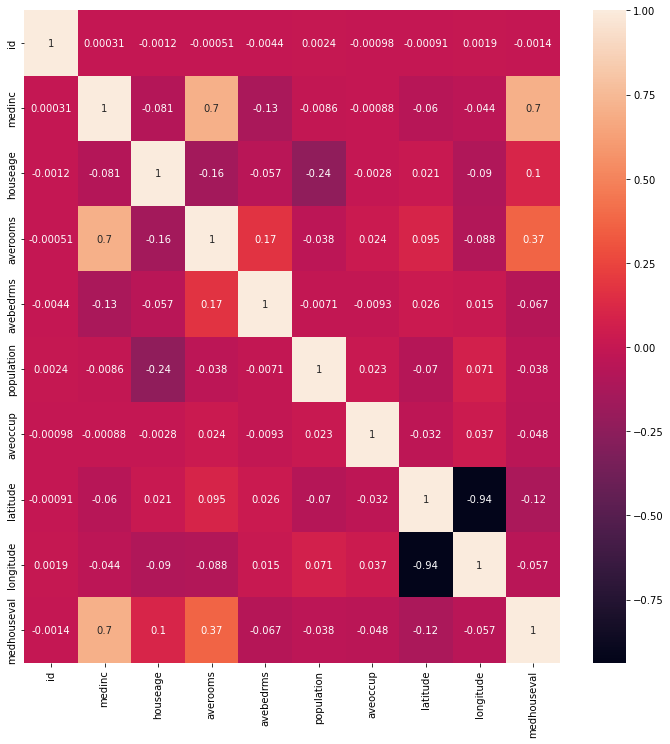

In [6]:
#This is a heatmap of the above information that makes it easier to see the features
#that correlate with each other (if any).
plt.figure(figsize=(12,12))
sns.heatmap(housing_train.corr(), annot=True)
plt.show()

The correlation map above shows that median income is highly correlated iwth the median value of the house, along with average number of rooms.  This makes sense as you spend more on a house if you earn more money.

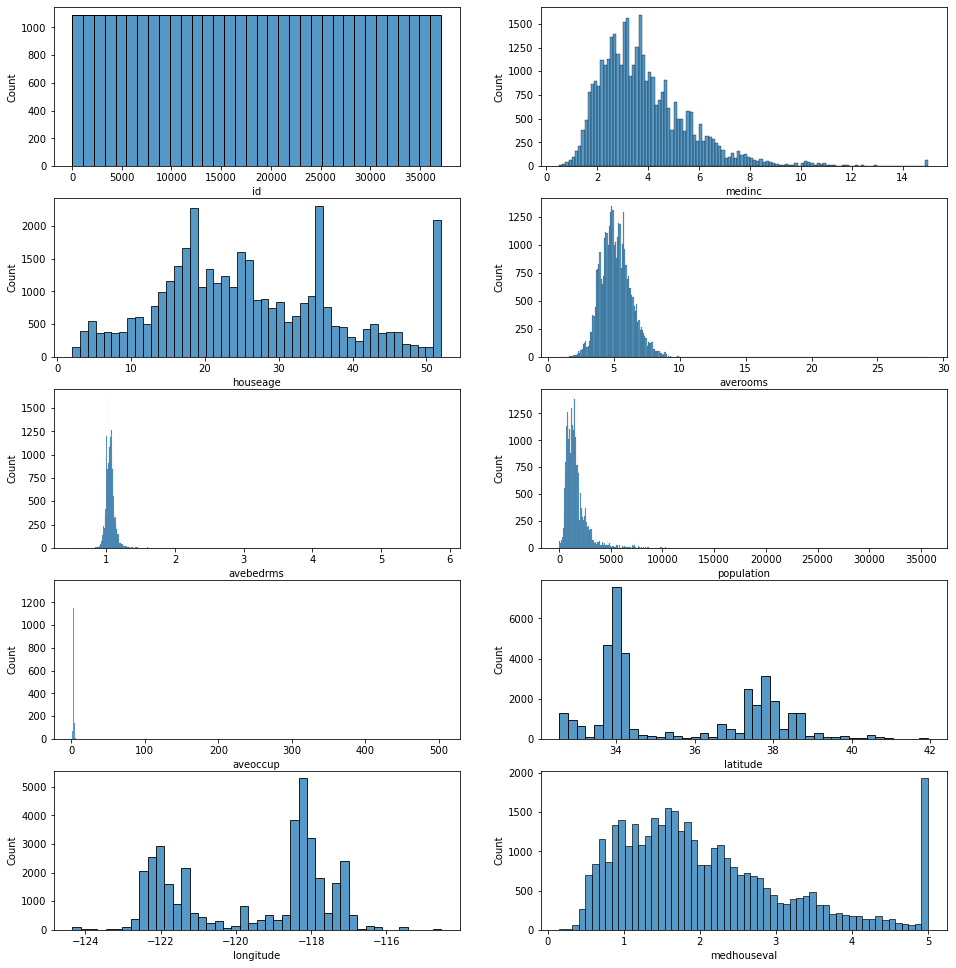

In [7]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in housing_train.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.histplot(housing_train[i],ax=ax)

# Data Engineering

In [8]:
num_pipe = make_pipeline(
    RobustScaler(),
    StandardScaler(),
    MinMaxScaler()

)

In [9]:
housing_train.columns

Index(['id', 'medinc', 'houseage', 'averooms', 'avebedrms', 'population',
       'aveoccup', 'latitude', 'longitude', 'medhouseval'],
      dtype='object')

In [10]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['id', 'latitude', 'longitude', 'medhouseval']),
    ('num_preprocessing', num_pipe, ['medinc', 'houseage', 'averooms', 'avebedrms', 'population','aveoccup'])
    ])

In [11]:
feature_transform.fit_transform(housing_train)
#feature_transform.fit_transform(housing_test)

array([[ 0.00000000e+00,  3.46000000e+01, -1.20120000e+02, ...,
         1.13917558e-01,  3.57913619e-02,  3.06148311e-03],
       [ 1.00000000e+00,  3.86900000e+01, -1.21220000e+02, ...,
         1.03145024e-01,  4.20695647e-02,  5.70289346e-03],
       [ 2.00000000e+00,  3.47100000e+01, -1.20450000e+02, ...,
         1.12256523e-01,  2.96532975e-02,  3.01689094e-03],
       ...,
       [ 3.71340000e+04,  3.77500000e+01, -1.22440000e+02, ...,
         1.11942100e-01,  3.23159281e-02,  9.59552489e-04],
       [ 3.71350000e+04,  3.84000000e+01, -1.20980000e+02, ...,
         1.05780185e-01,  1.62840887e-02,  3.69224819e-03],
       [ 3.71360000e+04,  3.63400000e+01, -1.19640000e+02, ...,
         1.03976668e-01,  3.74730233e-02,  5.67497004e-03]])

# Split Data

In [12]:
X=housing_train.drop(['medhouseval'], axis=1)
y=housing_train['medhouseval']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 12)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27852, 9), (9285, 9), (27852,), (9285,))

# Random Forest Regressor Model

In [15]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=4, random_state = 12)    #Hyperparam: n_estimators(number of trees)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=12)

In [16]:
y_pred_rfr = rfr.predict(X_train)

In [17]:
y_pred_rfr.shape

(27852,)

In [18]:
round(rfr.score(X_train, y_train),3)

0.601

In [19]:
round(rfr.score(X_test, y_test),3)

0.594

In [20]:
# summarize feature importance
for i,v in enumerate(rfr.feature_importances_):
        print('Feature: %0d, Score: %.5f' % (i,   v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.86178
Feature: 2, Score: 0.02029
Feature: 3, Score: 0.02284
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.08588
Feature: 7, Score: 0.00904
Feature: 8, Score: 0.00015


In [21]:
RMSE_RFR=mean_squared_error(y_train, y_pred_rfr)
RMSE_RFR

0.5322838068161329

## Cross Validation RFR

In [22]:
cross_r2_log_rfr = cross_val_score(rfr,  #estimator: the model that you want to evalueate
                                     X_train, # the training data
                                     y_train,  # the training data
                                     cv = 5 , # number of cross validation datasets, k-folds
                                     scoring = 'r2' # evaluation metric

)

In [23]:
cross_r2_log_rfr.mean()

0.5982744999831845

# Linear Regression Model

In [24]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [25]:
round(mlr.score(X_train, y_train),3)

0.605

In [26]:
y_pred_train_LR =mlr.predict(X_train)

In [27]:
RMSE_LR=mean_squared_error(y_train, y_pred_train_LR)
RMSE_LR

0.5269118447837412

## Cross Validation - Linear Regression

In [28]:
cross_R2_log_LR = cross_val_score(mlr,  #estimator: the model that you want to evalueate
                                     X_train, # the training data
                                     y_train,  # the training data
                                     cv = 5 , # number of cross validation datasets, k-folds
                                     scoring = 'r2' # evaluation metric

)

In [29]:
cross_R2_log_LR.mean()

0.19764533597940878

# Polynomial Regression

In [30]:
# Instantiate the transformation with degree of 2
DEGREE = 2
poly = PolynomialFeatures(degree=DEGREE,include_bias=False)

In [31]:
# fit and transform on X_train
X_train_poly = poly.fit_transform(X_train)

In [32]:
# transform only on X_test
X_test_poly = poly.transform(X_test) 

In [33]:
# instantiate  Linear Regression
m_poly = LinearRegression()

# fit the model on X_train
m_poly.fit(X_train_poly, (y_train))

LinearRegression()

In [34]:
# And the predictions
ypred_train_poly = m_poly.predict(X_train_poly)
#ypred_test_poly = m_poly.predict(X_test_poly)

In [35]:
RMSE_poly=mean_squared_error(y_train, ypred_train_poly)
RMSE_poly

0.44402371920547445

## Cross-Validation Polynomial Regression

In [36]:
cross_R2_log_poly = cross_val_score(m_poly,  #estimator: the model that you want to evalueate
                                     X_train_poly, # the training data
                                     y_train,  # the training data
                                     cv = 5 , # number of cross validation datasets, k-folds
                                     scoring = 'r2' # evaluation metric

)


In [37]:
cross_R2_log_poly.mean()

-723.0705972925201

# Regularization

In [38]:
m_elastic_net = ElasticNet(alpha=.1, l1_ratio=.5,
                           random_state=168)

In [39]:
m_elastic_net.fit(X_train_poly, (y_train))

/Users/karenbolon/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.741e+03, tolerance: 3.711e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1, random_state=168)

In [40]:
ypred_elastic = m_elastic_net.predict(X_train_poly)

In [41]:
RMSE_reg=mean_squared_error(y_train, ypred_elastic)
RMSE_reg

0.47252278535019837

# GridSearch CV

## Random Forest

In [42]:
 #initialise your model
RFR = RandomForestRegressor(n_estimators = 1, random_state = 0)
RFR.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [43]:
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1, random_state=0)

In [44]:
training_score = RFR.score(X_train, y_train)
training_score

0.7949791554174158

In [45]:
#Predictions on training data
y_pred_RFR = RFR.predict(X_train)

## GridSearch

In [46]:
parameters = { 'n_estimators' : [2 ** i for i in range(3, 10)],  # parameters grid
              'max_depth': [2, 4, 8, 16, 32, None]
}

In [47]:
cv_h = GridSearchCV(estimator=RFR, param_grid=parameters, cv=5, scoring='r2')

In [48]:
cv_h.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1, random_state=0),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [8, 16, 32, 64, 128, 256, 512]},
             scoring='r2')

In [49]:
#Predictions on training data
y_pred_rfr = RFR.predict(X_train)

In [50]:
def print_results(results):
    print('BEST MODEL PARAMETERS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    for mean, params in zip(means, results.cv_results_['params']):
        print('{}  for {}'.format(round(mean, 4), params))

In [51]:
results = pd.DataFrame(cv_h.cv_results_)

In [52]:
RFR_best = cv_h.best_estimator_
RFR_best

#RandomForestRegressor(max_depth=16, n_estimators=512, random_state=0)

RandomForestRegressor(max_depth=16, n_estimators=512, random_state=0)

In [53]:
 #initialise your model
RFR2 = RandomForestRegressor(max_depth=16, n_estimators = 512, random_state = 0)


In [54]:
RFR2.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=512, random_state=0)

In [55]:
training_score2 = RFR2.score(X_train, y_train)
training_score2

0.9330086812462235

In [56]:
#Predictions on training data
y_pred_RFR2 = RFR2.predict(X_train)